In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpl
import json


with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None


In [42]:
df.isnull().sum()

area                     0
distance_to_metro        0
build_year             706
has_parking              0
floor                    0
is_new                   0
price                    0
price_m2                 0
date_added           10058
dtype: int64

In [43]:
df.describe()[1:].apply(lambda x: round(x, 3))

,area,distance_to_metro,build_year,floor,price,price_m2
mean,60.039,2219.456,1995.803,3.193,1.155377e+06,18872.345
std,36.656,2095.967,29.282,3.127,9.496621e+05,6421.052
min,14.530,0.684,1820.000,-1.000,7.820000e+02,13.030
25%,40.592,622.963,1972.000,1.000,6.900000e+05,14900.000
50%,52.440,1551.432,2006.000,2.000,8.740625e+05,17526.320
75%,68.000,3214.736,2023.000,4.000,1.262000e+06,21242.858
max,1892.030,14567.860,2027.000,45.000,1.700000e+07,170000.000


ValueError: RGBA sequence should have length 3 or 4

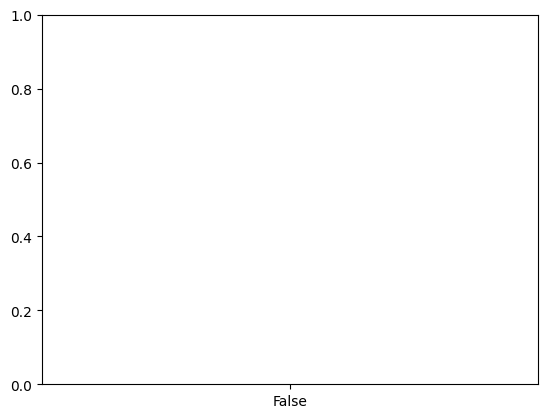

In [65]:
#ilość nowych i starych ogłoszeń 
sns.countplot(x = df["is_new"], color=["blue","orange"])

C:\Users\mateu\AppData\Local\Temp\ipykernel_18492\594227790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["has_parking"], palette=["blue", "orange"])


<Axes: xlabel='has_parking', ylabel='count'>

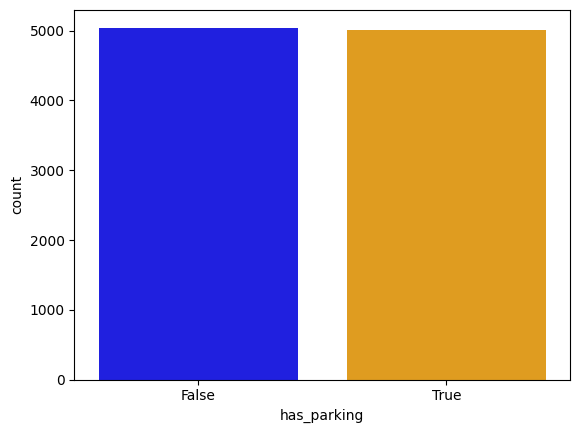

In [45]:
#ilość ogłoszeń, które zawierają parking lub nie
sns.countplot(x = df["has_parking"], palette=["blue", "orange"])

(5000.0, 50000.0)

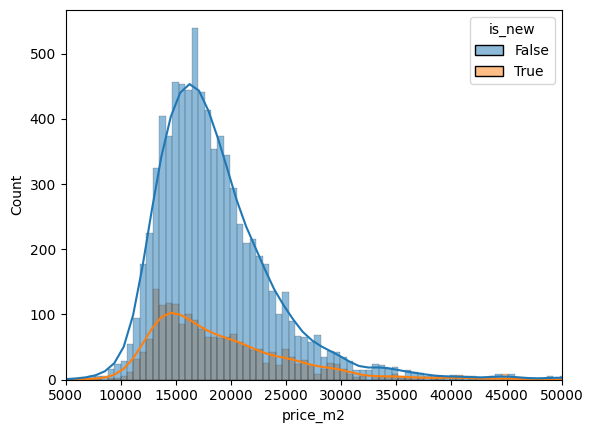

In [46]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od długości trwania ogłoszenia)
sns.histplot(x = df["price_m2"], kde=True, hue=df["is_new"])
mpl.xlim(5000, 50000)

(5000.0, 50000.0)

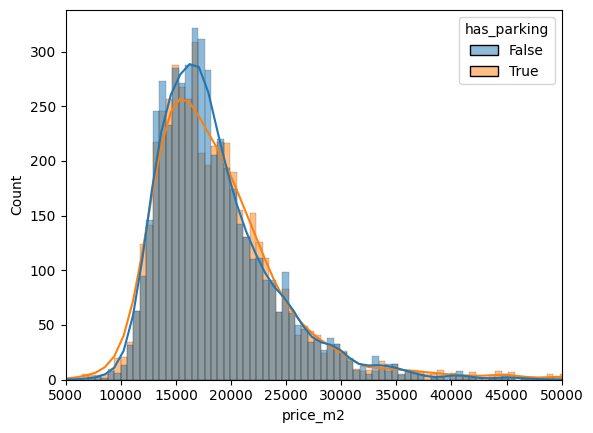

In [47]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)
sns.histplot(x = df["price_m2"], kde=True, hue=df["has_parking"])
mpl.xlim(5000, 50000)

<Axes: xlabel='distance_to_metro', ylabel='Count'>

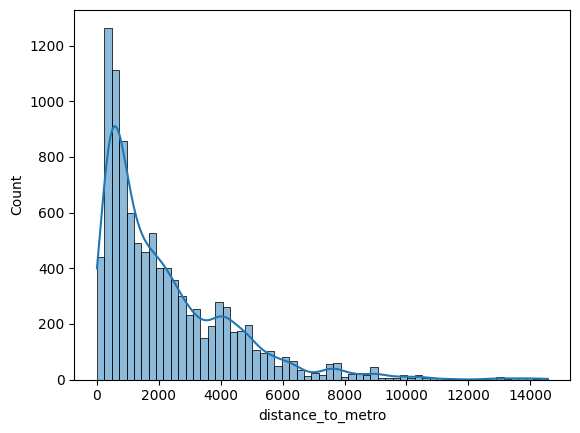

In [48]:
#Wizualizacja rozkładu odległości od metra
sns.histplot(x=df.distance_to_metro, kde=True)

(0.0, 8000.0)

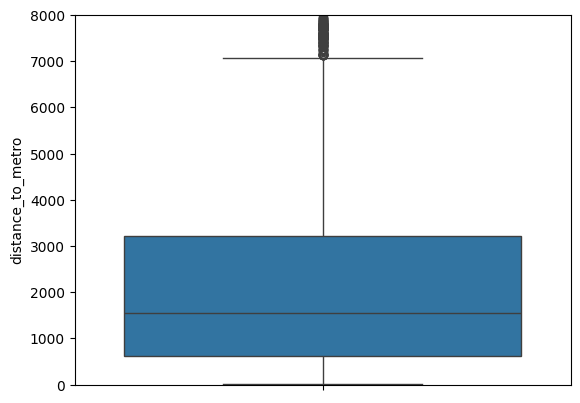

In [49]:
#boxplocik 
sns.boxplot(y = df.distance_to_metro)
mpl.ylim(0, 8000)

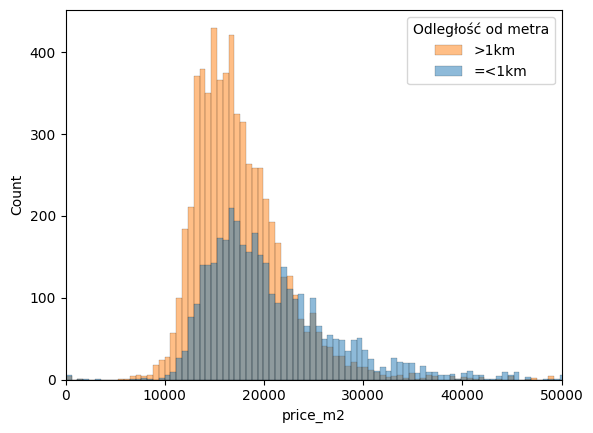

In [50]:
#zależność miedzy ceną za metr kwadratowy a odległością od metra

sns.histplot(x= df.price_m2 ,hue = df.distance_to_metro.apply(lambda x: x > 1000))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

(1900.0, 2037.35)

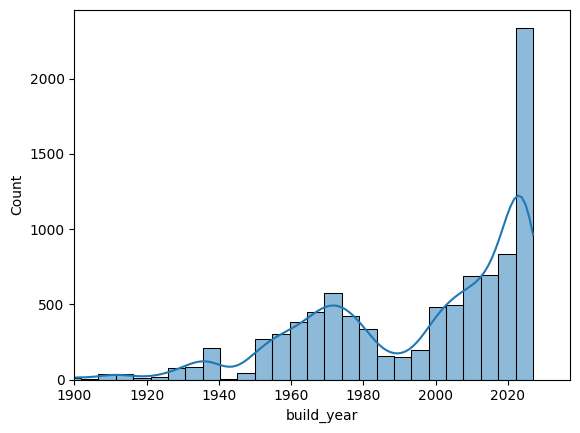

In [63]:
#Wizualizacja rozkładu roku wybudowania mieszkania
sns.histplot(x = df.build_year, kde = True)
mpl.xlim(1900,)

<Axes: ylabel='build_year'>

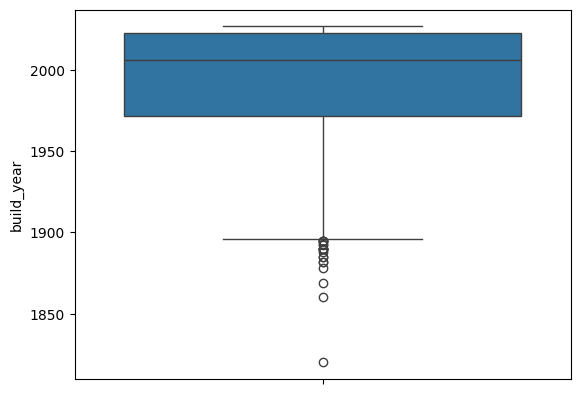

In [59]:
sns.boxplot(y = df.build_year)